In [97]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')

Recreate this figure as best you can using the techniques we have learned:

![](02_example.png)

Work with the gapminder dataset. The following will give you four tables.
1. A table for 1952 data.
1. A table for 2002 data.
1. A table for just Kuwait in 1952. 
1. A table for just Kuwait in 2002. 

In [86]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait') 

In [87]:
gapminder%>% head

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


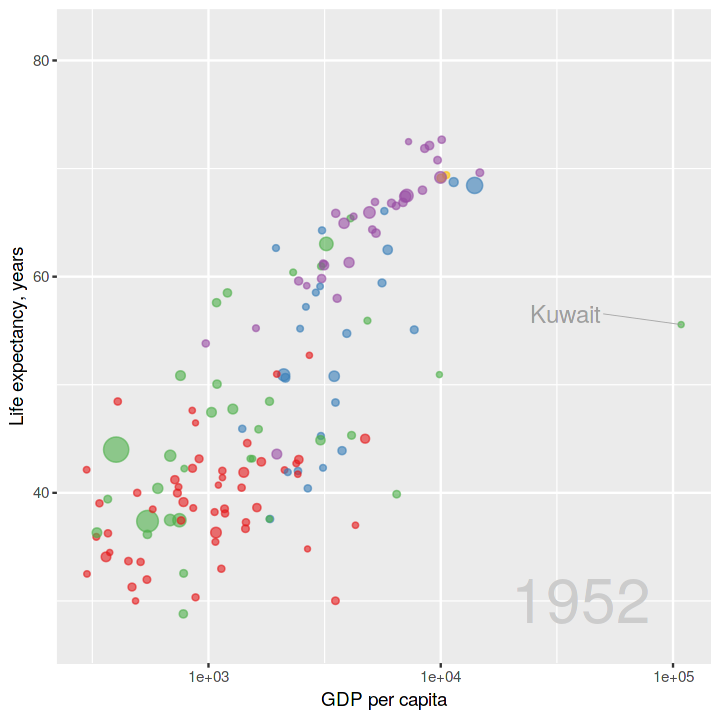

In [94]:
p = ggplot(df.1952, aes(x = gdpPercap , y = lifeExp, color = continent,size = pop))

p = p + geom_point(alpha= 0.6)

options(repr.plot.width=6, repr.plot.height=6)


 p = p + geom_text_repel(data = df.1952.kuwait,
                        segment.color = 'grey60',
                        segment.size = 0.2,
                        alpha = 0.8,
                        nudge_x = -0.5,
                        nudge_y = 1,
                        aes(x = gdpPercap, y = lifeExp, label = country),
                        show.legend=FALSE,
                        size = 5,
                        color = 'grey55')
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)

p = p + scale_color_manual(values = c('#e41a1c',
                                      '#377eb8',
                                      '#4daf4a',
                                      '#984ea3',                                 
                                      '#ffbf00'))
p = p + ylim(c(27, 82))
p = p + scale_x_log10()


p = p + theme(legend.position = 'none',
              strip.background = element_blank(),
              )

p = p + labs(y = 'Life expectancy, years', x = 'GDP per capita',color = "Continent",size = "Population")
p = p + annotate('text',x=4e+4, y = 30 , label = '1952',size=13, color='grey80') 
p

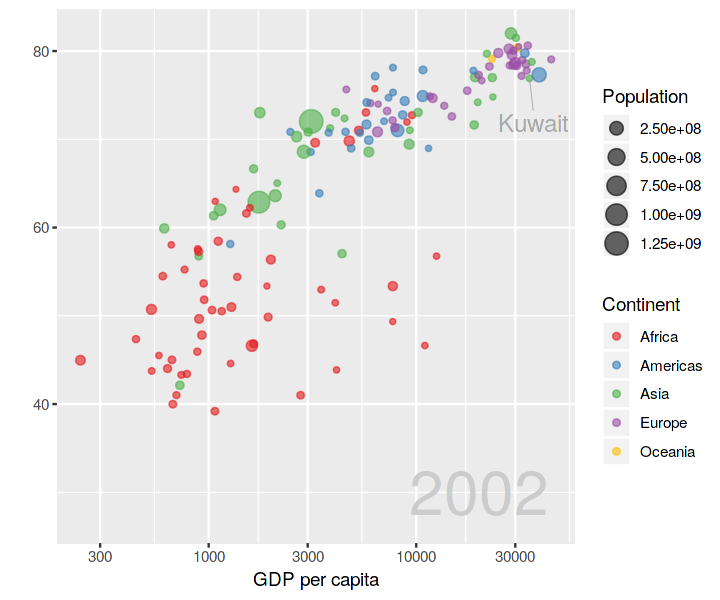

In [98]:
q = ggplot(df.2002, aes(x = gdpPercap , y = lifeExp, color = continent,size = pop))

q = q + geom_point(alpha=0.6)

options(repr.plot.width=6, repr.plot.height=5)



q = q + geom_text_repel(data = df.2002.kuwait,
                        segment.color = 'grey60',
                        segment.size = 0.2,
                        alpha = 0.8,
                        aes(x = gdpPercap, y = lifeExp, label = country),
                        color = 'grey60',
                        show.legend=FALSE,
                        nudge_x= 1,
                        nudge_y =-5,
                        size = 5,)


q = q + scale_color_manual(values = c('#e41a1c',
                                      '#377eb8',
                                      '#4daf4a',
                                      '#984ea3',                                 
                                      '#ffbf00'))
q = q + ylim(c(27, 82))
q = q + scale_x_log10()


q = q + theme(legend.position = 'right',
              strip.background = element_blank(),
              )

q = q + labs(y = '', x = 'GDP per capita',color = "Continent",size = "Population")
q=q + annotate('text',x=2e+4, y = 30 , label = '2002',size=13, color='grey80') 
q

In [105]:
q = q + scale_size(breaks = seg(4e+5, 66e+9,3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
q

ERROR: Error in wavier(1e+05, 1.5e+09, 3e+08): could not find function "wavier"


In [104]:
?scale_size


scale_size {ggplot2},R Documentation
name,"The name of the scale. Used as the axis or legend title. If waiver(), the default, the name of the scale is taken from the first mapping used for that aesthetic. If NULL, the legend title will be omitted."
breaks,One of: NULL for no breaks waiver() for the default breaks computed by the transformation object A numeric vector of positions A function that takes the limits as input and returns breaks as output
labels,One of: NULL for no labels waiver() for the default labels computed by the transformation object A character vector giving labels (must be same length as breaks) A function that takes the breaks as input and returns labels as output
limits,One of: NULL to use the default scale range A numeric vector of length two providing limits of the scale. Use NA to refer to the existing minimum or maximum A function that accepts the existing (automatic) limits and returns new limits
range,a numeric vector of length 2 that specifies the minimum and maximum size of the plotting symbol after transformation.
trans,"Either the name of a transformation object, or the object itself. Built-in transformations include ""asn"", ""atanh"", ""boxcox"", ""date"", ""exp"", ""hms"", ""identity"", ""log"", ""log10"", ""log1p"", ""log2"", ""logit"", ""modulus"", ""probability"", ""probit"", ""pseudo_log"", ""reciprocal"", ""reverse"", ""sqrt"" and ""time"". A transformation object bundles together a transform, its inverse, and methods for generating breaks and labels. Transformation objects are defined in the scales package, and are called name_trans, e.g. scales::boxcox_trans(). You can create your own transformation with scales::trans_new()."
guide,A function used to create a guide or its name. See guides() for more info.
...,"Arguments passed on to continuous_scale nameThe name of the scale. Used as the axis or legend title. If waiver(), the default, the name of the scale is taken from the first mapping used for that aesthetic. If NULL, the legend title will be omitted. breaksOne of: NULL for no breaks waiver() for the default breaks computed by the transformation object A numeric vector of positions A function that takes the limits as input and returns breaks as output minor_breaksOne of: NULL for no minor breaks waiver() for the default breaks (one minor break between each major break) A numeric vector of positions A function that given the limits returns a vector of minor breaks. labelsOne of: NULL for no labels waiver() for the default labels computed by the transformation object A character vector giving labels (must be same length as breaks) A function that takes the breaks as input and returns labels as output limitsOne of: NULL to use the default scale range A numeric vector of length two providing limits of the scale. Use NA to refer to the existing minimum or maximum A function that accepts the existing (automatic) limits and returns new limits oobFunction that handles limits outside of the scale limits (out of bounds). The default replaces out of bounds values with NA. na.valueMissing values will be replaced with this value. transEither the name of a transformation object, or the object itself. Built-in transformations include ""asn"", ""atanh"", ""boxcox"", ""date"", ""exp"", ""hms"", ""identity"", ""log"", ""log10"", ""log1p"", ""log2"", ""logit"", ""modulus"", ""probability"", ""probit"", ""pseudo_log"", ""reciprocal"", ""reverse"", ""sqrt"" and ""time"". A transformation object bundles together a transform, its inverse, and methods for generating breaks and labels. Transformation objects are defined in the scales package, and are called name_trans, e.g. scales::boxcox_trans(). You can create your own transformation with scales::trans_new(). guideA function used to create a guide or its name. See guides() for more info. positionThe position of the axis. ""left"" or ""right"" for vertical scales, ""top"" or ""bottom"" for horizontal scales superThe super class to use for the constructed s

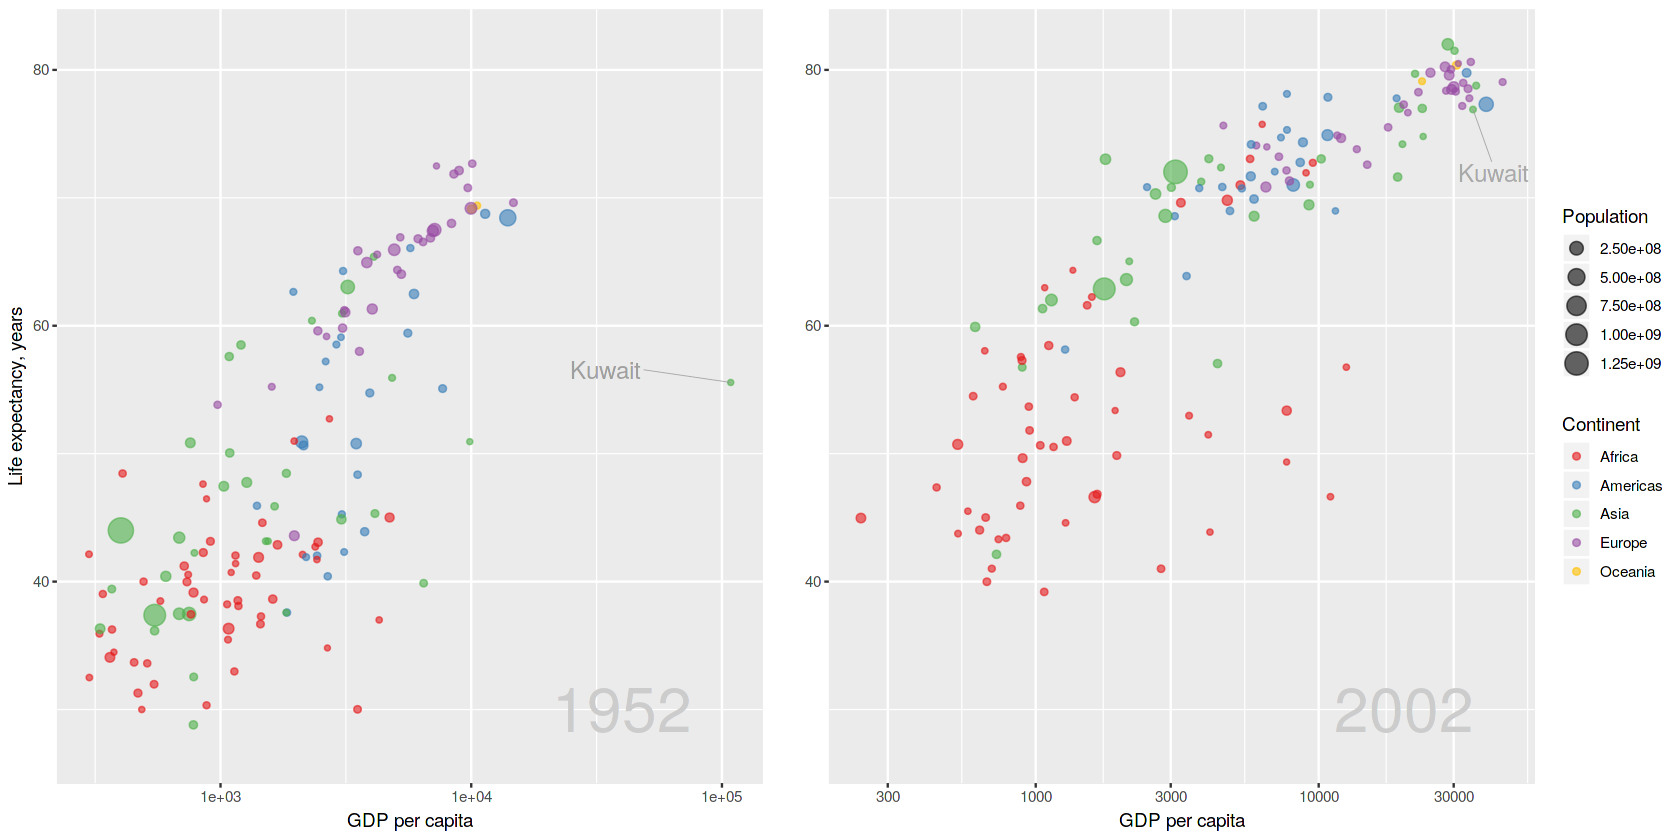

In [99]:

options(repr.plot.width=14, repr.plot.height=7)
p + q

## Hints!

These snippets will help you to get the legends and scales as they're set in the example.

- This is how the size scale is set:

```R
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
```  

- This is how the `y-axis` is fixed for each plot:

```R
p = p + ylim(c(27, 82))
```

- This will set the `x-axis` to a log-scale:

```R
p = p + scale_x_log10()
```

- The `annotate` function is useful for adding text to a figure that's not mapped to data. [annotate documentation](https://ggplot2.tidyverse.org/reference/annotate.html). 

- Don't forget about third-party packages like `ggrepel` and `patchwork`!